In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from colorama import Fore, Back, Style 

In [2]:
# Import dataset
df = pd.read_csv('Dataset_spine.csv')
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN


In [3]:
# Drop unnecessary information
df.drop(["Unnamed: 13"],axis=1,inplace=True)
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [4]:
# Describr dataset
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [5]:
# check null values
df.isnull().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

There are no null values in the dataset.

In [6]:
# Check for the duplicates values
duplicates = df.duplicated().sum()
if duplicates == 0:
    print('There are no duplicated entries.')
else:
    print(f'There are {duplicates} duplicates.')

There are no duplicated entries.


In [7]:
df.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", }, inplace=True)

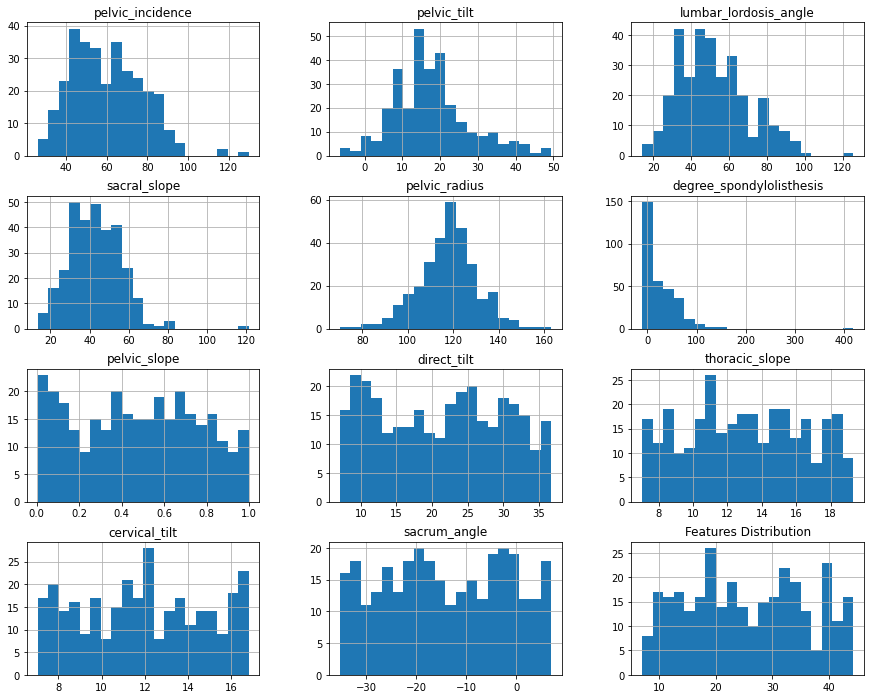

In [8]:
df.hist(figsize=(15,12),bins = 20)
plt.title("Features Distribution")
plt.show()

In [9]:
# Count normal and abnormal values
df["Class_att"].value_counts()


Abnormal    210
Normal      100
Name: Class_att, dtype: int64

It can be seen that, there are 210 abnormal and 100 normal classes. The dataset is littlebit unbalanced.

In [10]:
df.groupby('Class_att').mean()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Class_att,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528712,26.694019


In [11]:
# Rename the Abnormal class as 1 and normal as 0
df.Class_att = [1 if each == "Abnormal" else 0 for each in df.Class_att]

In [12]:
#assign Class_att column as y attribute
y = df.Class_att.values

#drop Class_att column, remain only numerical columns
new_df = df.drop(["Class_att"],axis=1)

In [13]:
# Seprate predictors (independent variables) X and predictand  (dependent variable) Y
X = new_df
Y = df["Class_att"]

In [14]:
#Many machine learning algorithms perform better or converge faster when features are on a relatively similar 
#scale and/or close to normally distributed.

from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state =42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(random_state=0).fit(x_train, y_train)

In [17]:
from sklearn.metrics import accuracy_score, classification_report
pred = my_model.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.8064516129032258

Precision = TP/(TP+FP)

What proportion of positive identifications was actually correct?

Recall = TP/(TP+FN)

What proportion of actual positives was identified correctly?

In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        18
           1       0.83      0.91      0.87        44

    accuracy                           0.81        62
   macro avg       0.77      0.73      0.75        62
weighted avg       0.80      0.81      0.80        62



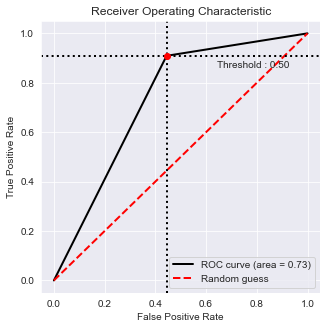

In [19]:
#  Receiver Operating Characteristic curve (ROC curve)
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred, labels=["Normal", "Abnormal"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

Text(0.5, 16.0, 'Predicted label')

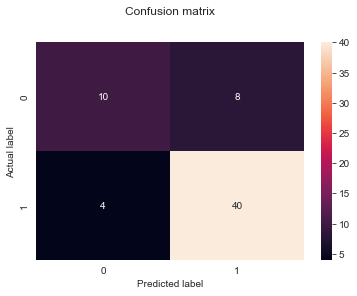

In [20]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True )
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy of Logistic Regression is :  85.48%
Accuracy of Support Vector Classifier is :  82.26%
Accuracy of K Neighbors Classifier is :  79.03%
Accuracy of Decision Tree Classifier is :  72.58%
Accuracy of Random Forest Classifier is :  80.65%
Accuracy of Gradient Boosting is :  80.65%


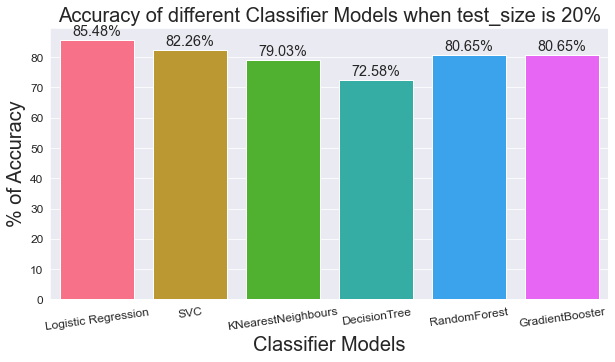

In [21]:
accuracy_list = []
## logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
##Support vector classifier
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)
### K Neighbors Classifier
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
### Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
### RandomForestClassifier
r_clf = RandomForestClassifier( random_state=0)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
## Gradient Boosting Classifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))
print(Fore.GREEN + "Accuracy of Support Vector Classifier is : ", "{:.2f}%".format(100* sv_clf_acc))
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster']
plt.rcParams['figure.figsize']=10,5
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models when test_size is 20%', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [22]:
import shap
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(x_test )
#shap_values = explainer.shap_values(x_test, check_additivity = False )

In [23]:
print(len(shap_values))
shap_values[1].shape

2


(62, 12)

In [24]:
features_name = df.columns
features_name

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Class_att'],
      dtype='object')

In [25]:
i = 1
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], x_test[i],feature_names = features_name[1])

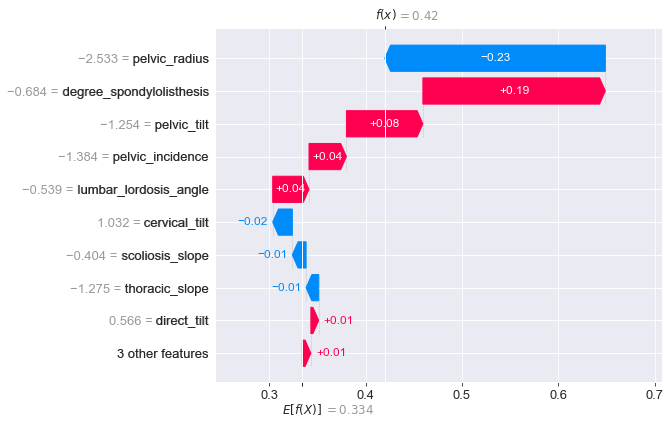

In [26]:
i = 1
shap.waterfall_plot(shap.Explanation(values=shap_values[0][i], 
                                              base_values=explainer.expected_value[0],
                                     data=x_test[i],feature_names = features_name))

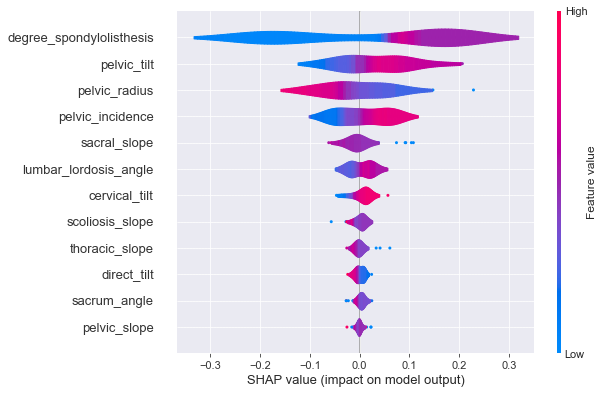

In [27]:
# shap.summary_plot(shap_values[1], x_test)
shap.summary_plot(shap_values[1], x_test, plot_type = 'violin',feature_names = features_name)

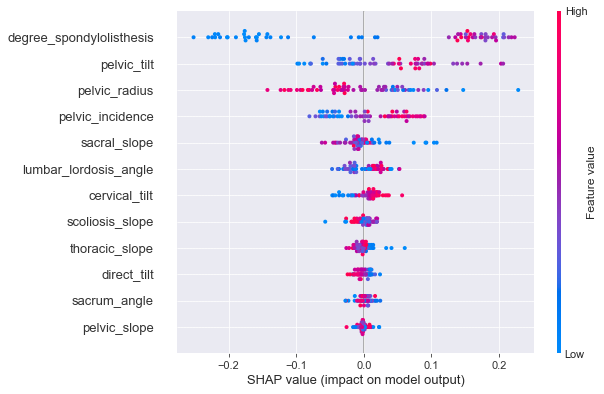

In [28]:
# shap.summary_plot(shap_values[1], x_test)
shap.summary_plot(shap_values[1], x_test,feature_names = features_name)

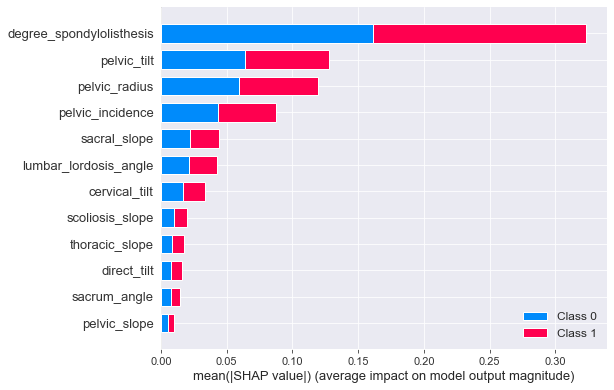

In [29]:
shap.summary_plot(shap_values, x_test,feature_names = features_name)

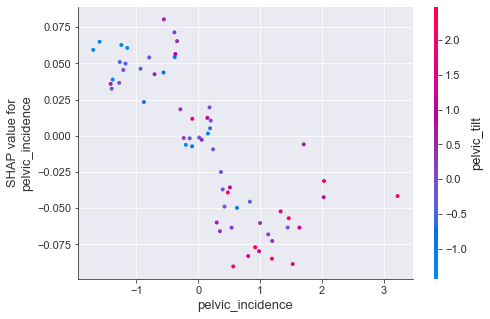

In [30]:
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
shap.dependence_plot(0, shap_values[0], x_test,feature_names = features_name)

## Removing outliers

In [31]:
# Separate all the predictors
numeric_columns = df.iloc[:, 0:12]
numeric_columns

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171
...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192


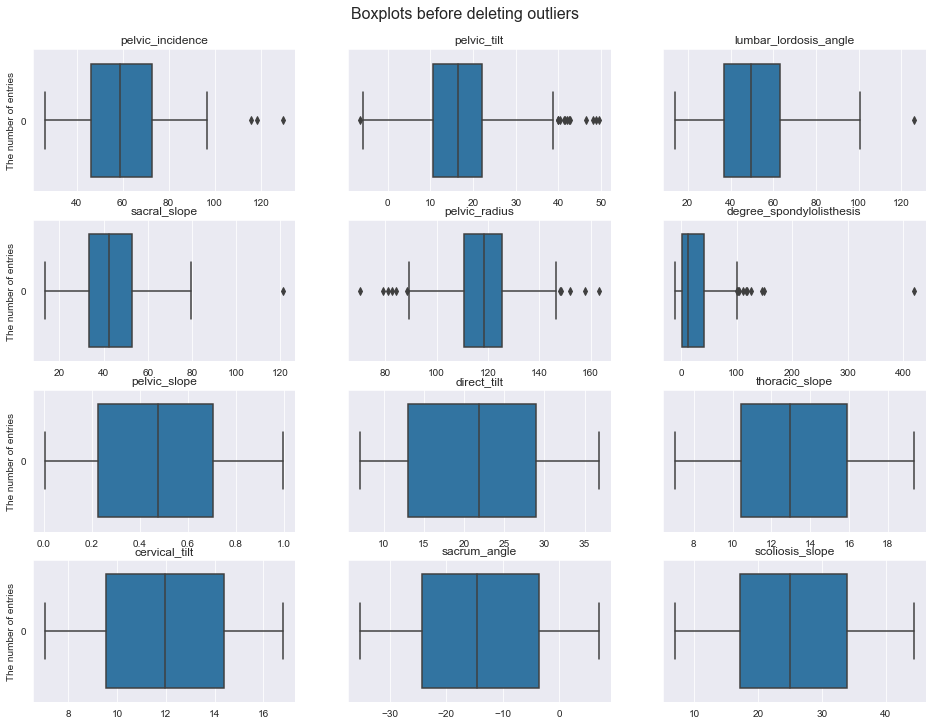

In [32]:
# Check for outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=3, suptitle='Boxplots before deleting outliers')

We can see some outliers in the data. Outliers can be real observed data or they can be error in the measurement (or typing error). These outliers have to be removed for better prediction.

In [33]:
# deleting outliers
Q1 = df.iloc[:, 0:12].quantile(0.25)
Q3 = df.iloc[:, 0:12].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_filtered = df[~((df.iloc[:, 0:12] < (Q1 - 1.5 * IQR)) |(df.iloc[:, 0:12] > (Q3 + 1.5 * IQR))).any(axis=1)]

display(df_filtered.shape)

Here we will get IQR for each column
 pelvic_incidence            26.447401
pelvic_tilt                 11.453326
lumbar_lordosis_angle       26.000000
sacral_slope                19.348766
pelvic_radius               14.758478
degree_spondylolisthesis    39.683625
pelvic_slope                 0.480479
direct_tilt                 15.899675
thoracic_slope               5.471725
cervical_tilt                4.830670
sacrum_angle                20.792428
scoliosis_slope             16.790525
dtype: float64


(279, 13)

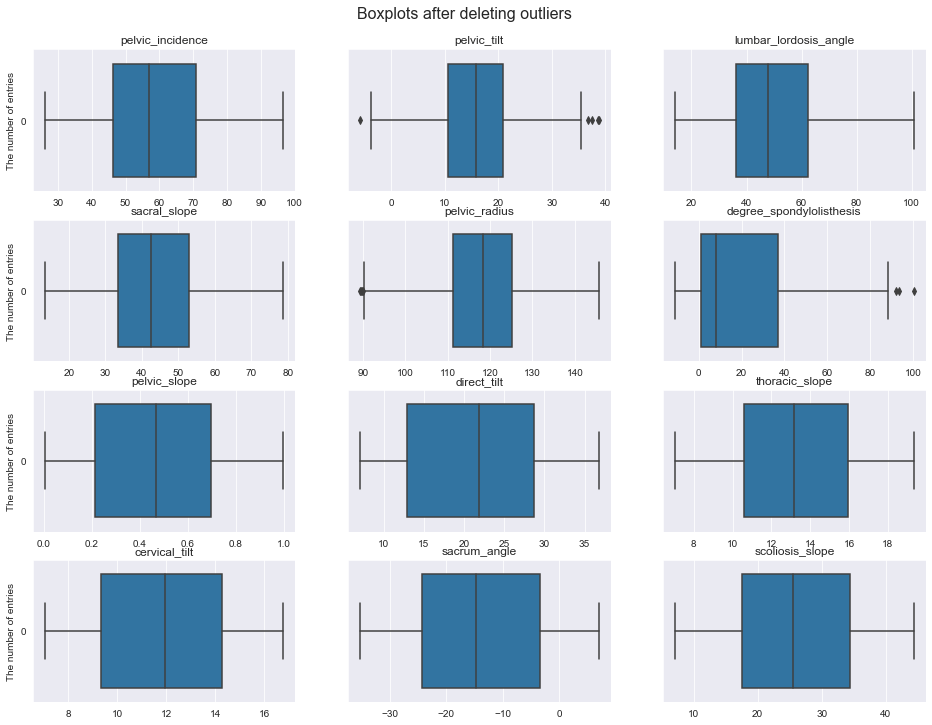

In [34]:
boxplots_custom(dataset=df_filtered, 
                columns_list=numeric_columns, 
                rows=4, cols=3, suptitle='Boxplots after deleting outliers')

In [35]:
df_filtered

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0


In [36]:
df_filtered.groupby('Class_att').mean()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Class_att,,,,,,,,,,,,
0,51.752010,12.826611,43.532094,38.925399,123.648372,2.298979,0.445001,21.712348,13.297203,11.523335,-14.360326,26.850214
1,63.024628,18.152308,54.800155,44.872321,114.751869,31.024702,0.479501,20.962804,13.130380,12.067757,-13.656585,25.586022


In [37]:
#assign Class_att column as y attribute
y = df_filtered.Class_att.values

#drop Class_att column, remain only numerical columns
new_df1 = df_filtered.drop(["Class_att"],axis=1)

In [38]:
X = new_df1
Y = df_filtered["Class_att"]

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state =42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(random_state=0).fit(x_train, y_train)

In [42]:
from sklearn.metrics import accuracy_score, classification_report
pred = my_model.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.8214285714285714

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.86      0.86      0.86        36

    accuracy                           0.82        56
   macro avg       0.81      0.81      0.81        56
weighted avg       0.82      0.82      0.82        56



Accuracy of Logistic Regression is :  87.50%
Accuracy of Support Vector Classifier is :  80.36%
Accuracy of K Neighbors Classifier is :  69.64%
Accuracy of Decision Tree Classifier is :  75.00%
Accuracy of Random Forest Classifier is :  83.93%
Accuracy of Gradient Boosting is :  80.36%


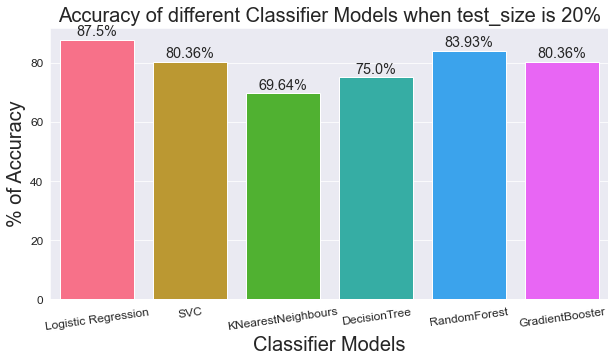

In [44]:
accuracy_list = []
## logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
##Support vector classifier
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)
### K Neighbors Classifier
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
### Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
### RandomForestClassifier
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
## Gradient Boosting Classifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))
print(Fore.GREEN + "Accuracy of Support Vector Classifier is : ", "{:.2f}%".format(100* sv_clf_acc))
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster']
plt.rcParams['figure.figsize']=10,5
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models when test_size is 20%', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [45]:
import shap
# Create object that can calculate shap values
explainer = shap.TreeExplainer(r_clf)

# Calculate Shap values
shap_values = explainer.shap_values(x_test )
#shap_values = explainer.shap_values(x_test, check_additivity = False )

In [46]:
print(len(shap_values))
shap_values[1].shape

2


(56, 12)

In [47]:
i = 1
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], x_test[i],feature_names = features_name[i])

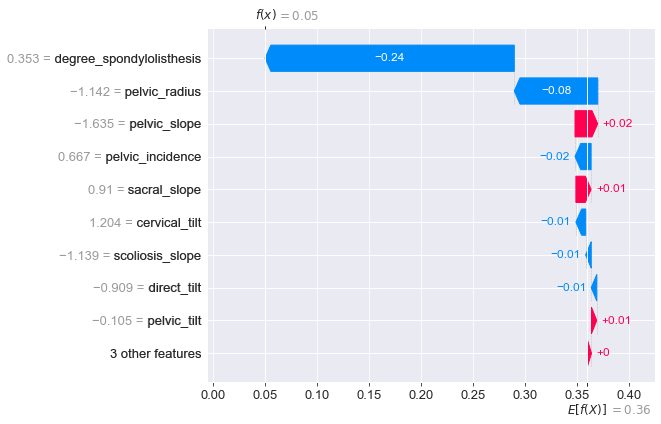

In [48]:
i = 1
shap.waterfall_plot(shap.Explanation(values=shap_values[0][i], 
                                              base_values=explainer.expected_value[0], data=x_test[i],feature_names = features_name))

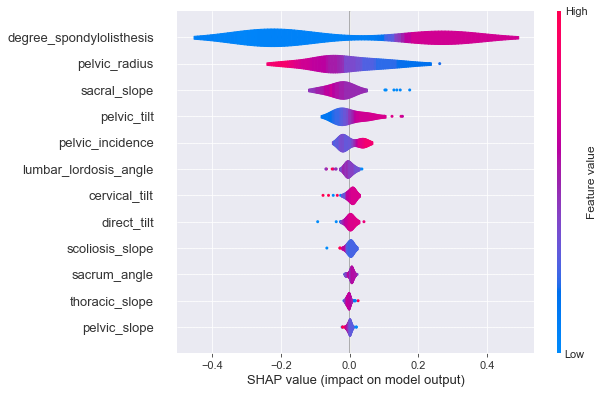

In [49]:
# shap.summary_plot(shap_values[1], x_test)
shap.summary_plot(shap_values[1], x_test, plot_type = 'violin',feature_names = features_name)

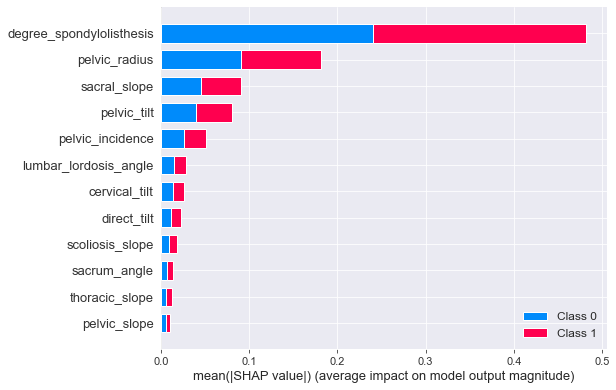

In [50]:
shap.summary_plot(shap_values, x_test,feature_names = features_name)

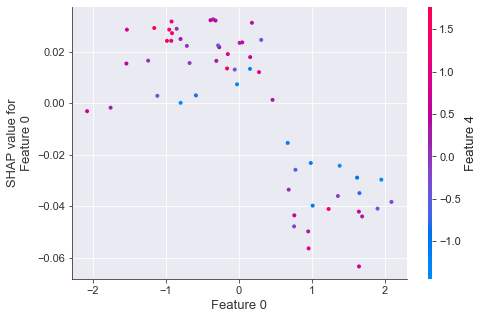

In [51]:
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
shap.dependence_plot(0, shap_values[0], x_test)

## Feature selection using corelation

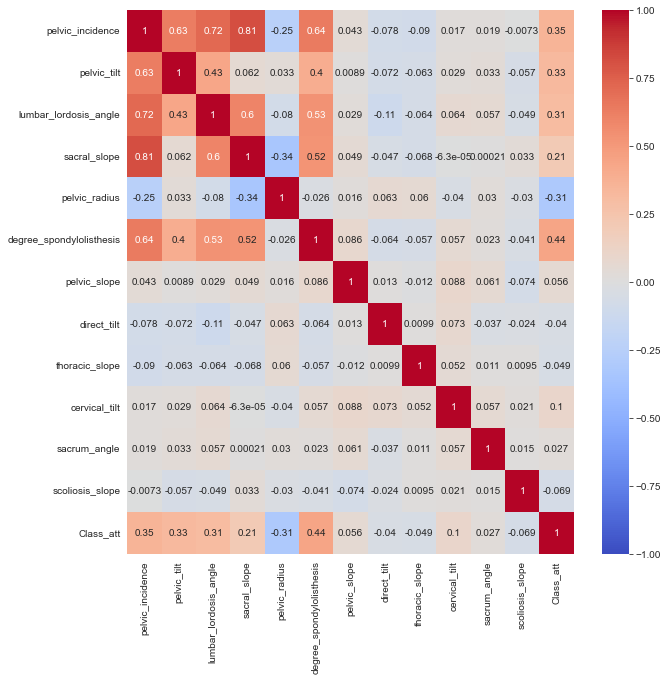

In [52]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [53]:
corr[abs(corr['Class_att']) > 0.3]['Class_att']

pelvic_incidence            0.353336
pelvic_tilt                 0.326063
lumbar_lordosis_angle       0.312484
pelvic_radius              -0.309857
degree_spondylolisthesis    0.443687
Class_att                   1.000000
Name: Class_att, dtype: float64

Accuracy of Logistic Regression is :  83.87%
Accuracy of Support Vector Classifier is :  87.10%
Accuracy of K Neighbors Classifier is :  80.65%
Accuracy of Decision Tree Classifier is :  82.26%
Accuracy of Random Forest Classifier is :  85.48%
Accuracy of Gradient Boosting is :  88.71%


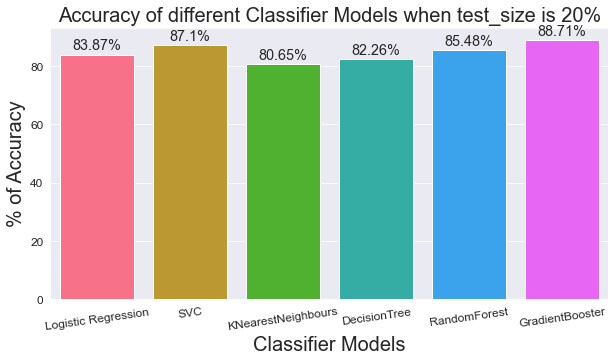

In [54]:
from sklearn.model_selection import train_test_split
Features1 = ['pelvic_incidence','pelvic_radius',"degree_spondylolisthesis"]
x = df[Features1]
y = df["Class_att"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=2)
accuracy_list = []
## logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
##Support vector classifier
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)
### K Neighbors Classifier
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
### Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
### RandomForestClassifier
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
## Gradient Boosting Classifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))
print(Fore.GREEN + "Accuracy of Support Vector Classifier is : ", "{:.2f}%".format(100* sv_clf_acc))
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster']
plt.rcParams['figure.figsize']=10,5
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models when test_size is 20%', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()